## E10-2
#### This Notebook is about using SPARK Dataframe functions to process nsedata.csv.

### <b>Problem</b>
- Write SPARK code to solve the problem stated at the end this Notebook (<b>do not use the createTempView function!</b>)

### <b>Submission</b>
Create and upload a PDF of this Notebook after completing your assignment. <b> BEFORE CONVERTING TO PDF and UPLOADING ENSURE THAT YOU REMOVE / TRIM LENGTHY DEBUG OUTPUTS </b>. Short debug outputs of up to 5 lines are acceptable.


In [ ]:
import findspark
findspark.init()

In [ ]:
import pyspark
from pyspark.sql.types import *

In [ ]:
sc = pyspark.SparkContext(appName="E10-2")

In [ ]:
ss = pyspark.sql.SparkSession(sc)

In [ ]:
dfr = ss.read

In [ ]:
schemaStruct = StructType()
schemaStruct.add("SYMBOL", StringType(), True)
schemaStruct.add("SERIES", StringType(), True)
schemaStruct.add("OPEN", DoubleType(), True)
schemaStruct.add("HIGH", DoubleType(), True)
schemaStruct.add("LOW", DoubleType(), True)
schemaStruct.add("CLOSE", DoubleType(), True)
schemaStruct.add("LAST", DoubleType(), True)
schemaStruct.add("PREVCLOSE", DoubleType(), True)
schemaStruct.add("TOTTRDQTY", LongType(), True)
schemaStruct.add("TOTTRDVAL", DoubleType(), True)
schemaStruct.add("TIMESTAMP", StringType(), True)
schemaStruct.add("ADDNL", StringType(), True)


In [ ]:
df = dfr.csv("/home/hduser/spark/nsedata.csv", schema=schemaStruct, header=True)

In [ ]:
df.printSchema()

In [ ]:
from pyspark.sql.functions import col, date_format, to_date

df1 = df.withColumn("TIMESTAMP2", date_format(to_date(col("TIMESTAMP"), "dd-MMM-yyyy"), "yyyy-MM"))

In [ ]:
df1.printSchema()

## Problem Statement
Using SPARK Dataframe functions write code to create the data shown below for all the traded companies. Save this data in an output file in <b>ascending order</b> of the company names, year and month.

<b>SYMBOL | Month-Year | min(CLOSE) | max(CLOSE) | avg(CLOSE) | stddev(CLOSE) | tradedCount |</b>

The output should appear as follows

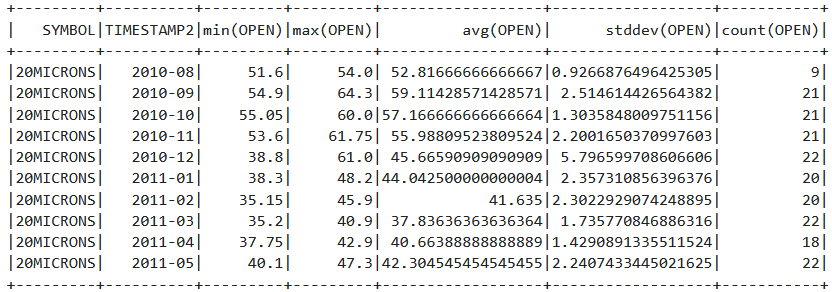

tradedCount = number of times the company shares have been traded in that month

#### Notes and Hints: 
- use the functions <b>groupBy</b> (based on SYMBOL and TIMESTAMP2) and <b>agg</b> to create the individual statistics like min, max, avg, etc.
- use <b>join</b> (based on SYMBOL and TIMESTAMP2) to combine the individual dataframes into a single table

This is just one method of solving the problem! You can discover of any other method, using any other combination of Dataframe functions- 

In [ ]:
ss.stop()
sc.stop()